In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

%matplotlib inline

In [2]:
threads = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

def read_data(test_name: str) -> pd.DataFrame:
    results_files = [f"../jmeter/results-{test_name}-1000-{i}-1.jtl" for i in threads]
    li = []
    for i, filename in enumerate(results_files):
        df_new = pd.read_csv(filename, index_col=None, header=0)
        df_new["Threads"] = threads[i]
        li.append(df_new)

    return pd.concat(li, axis=0, ignore_index=True)


### Load Test A: GET /api/movie/list

In [3]:
dfa = read_data("a")
dfa.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,Threads
0,1650640554700,74,GET Request,200,OK,Thread Group (Users) 1-1,text,True,NaN,1151,133,2,2,http://localhost:8099/api/movie/list,69,0,21,10
1,1650640554700,74,GET Request,200,OK,Thread Group (Users) 1-2,text,True,NaN,1151,133,2,2,http://localhost:8099/api/movie/list,69,0,21,10
2,1650640554776,13,GET Request,200,OK,Thread Group (Users) 1-1,text,True,NaN,1151,133,2,2,http://localhost:8099/api/movie/list,13,0,0,10
3,1650640554777,12,GET Request,200,OK,Thread Group (Users) 1-2,text,True,NaN,1151,133,2,2,http://localhost:8099/api/movie/list,12,0,0,10
4,1650640554789,12,GET Request,200,OK,Thread Group (Users) 1-1,text,True,NaN,1151,133,3,3,http://localhost:8099/api/movie/list,12,0,0,10


In [4]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550000 entries, 0 to 549999
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   timeStamp        550000 non-null  int64  
 1   elapsed          550000 non-null  int64  
 2   label            550000 non-null  object 
 3   responseCode     550000 non-null  int64  
 4   responseMessage  550000 non-null  object 
 5   threadName       550000 non-null  object 
 6   dataType         550000 non-null  object 
 7   success          550000 non-null  bool   
 8   failureMessage   0 non-null       float64
 9   bytes            550000 non-null  int64  
 10  sentBytes        550000 non-null  int64  
 11  grpThreads       550000 non-null  int64  
 12  allThreads       550000 non-null  int64  
 13  URL              550000 non-null  object 
 14  Latency          550000 non-null  int64  
 15  IdleTime         550000 non-null  int64  
 16  Connect          550000 non-null  int6

In [5]:
dfa_by_threads = dfa.groupby("Threads").mean()
dfa_by_threads

,timeStamp,elapsed,responseCode,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,Latency,IdleTime,Connect
Threads,,,,,,,,,,,,
10,1.650641e+12,6.758100,200.00000,1.000000,NaN,1151.954000,133.0,9.740000,9.740000,6.719300,0.0,0.004700
20,1.650641e+12,9.313250,200.00000,1.000000,NaN,1151.973800,133.0,19.364100,19.364100,9.279400,0.0,0.004450
30,1.650641e+12,16.587133,271.10000,0.763000,NaN,940.652800,133.0,28.823567,28.823567,16.546067,0.0,0.005133
40,1.650641e+12,20.456675,252.50000,0.825000,NaN,995.858700,133.0,38.220325,38.220325,20.410100,0.0,0.005300
50,1.650641e+12,24.920480,247.38800,0.842040,NaN,1010.993520,133.0,48.449900,48.449900,24.866660,0.0,0.006640
60,1.650641e+12,23.618683,223.26000,0.922467,NaN,1082.592133,133.0,57.941033,57.941050,23.559733,0.0,0.006450
70,1.650641e+12,35.868671,219.59000,0.934700,NaN,1093.459171,133.0,67.961757,67.961771,35.797014,0.0,0.008329
80,1.650641e+12,36.841138,232.36625,0.892112,NaN,1055.563700,133.0,77.932362,77.932362,36.772600,0.0,0.006987
90,1.650640e+12,46.345189,243.79000,0.854033,NaN,1021.635133,133.0,87.213433,87.213444,46.273911,0.0,0.010856


In [6]:
dfa.groupby("Threads")["responseCode"].value_counts()

Threads  responseCode
10       200             10000
20       200             20000
30       200             22890
         500              7110
40       200             33000
         500              7000
50       200             42102
         500              7898
60       200             55348
         500              4652
70       200             65429
         500              4571
80       200             71369
         500              8631
90       200             76863
         500             13137
100      200             79272
         500             20728
Name: responseCode, dtype: int64

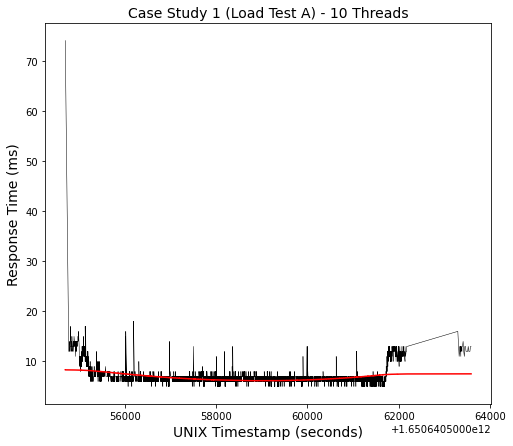

In [7]:
plt.figure(figsize=(8, 7))
t = 10
x = dfa[dfa["Threads"] == t]["timeStamp"]
y = dfa[dfa["Threads"] == t]["elapsed"]
plt.plot(x, y, color="black", lw=0.5)
plt.plot(x, savgol_filter(y, 10000, 2), color="red")
plt.title(f"Case Study 1 (Load Test A) - {t} Threads", fontsize=14)
plt.xlabel("UNIX Timestamp (seconds)", fontsize=14)
plt.ylabel("Response Time (ms)", fontsize=14)
plt.show()

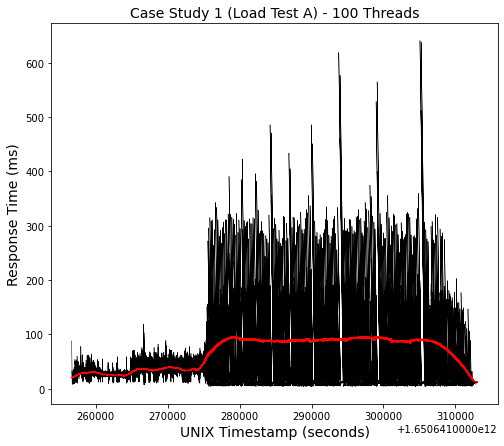

In [8]:
plt.figure(figsize=(8, 7))
t = 100
x = dfa[dfa["Threads"] == t]["timeStamp"]
y = dfa[dfa["Threads"] == t]["elapsed"]
plt.plot(x, y, color="black", lw=0.5)
plt.plot(x, savgol_filter(y, 10000, 2), color="red")
plt.title(f"Case Study 1 (Load Test A) - {t} Threads", fontsize=14)
plt.xlabel("UNIX Timestamp (seconds)", fontsize=14)
plt.ylabel("Response Time (ms)", fontsize=14)
plt.show()

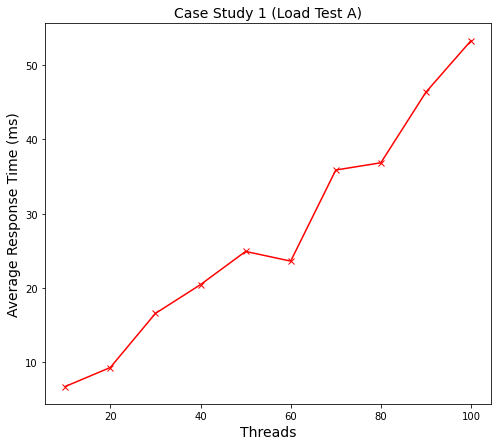

		Pearson correlation = 0.983


In [9]:
plt.figure(figsize=(8, 7))
x = dfa_by_threads.index
y = dfa_by_threads["elapsed"]
plt.plot(x, y, color="red", marker="x")
plt.title("Case Study 1 (Load Test A)", fontsize=14)
plt.xlabel("Threads", fontsize=14)
plt.ylabel("Average Response Time (ms)", fontsize=14)
plt.show()

print(f"\t\tPearson correlation = {round(np.corrcoef(x, y)[0][1], 3)}")

### Load Test B: POST /cinema/cineworld/reservation/make

In [10]:
dfb = read_data("b")
dfb.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,Threads
0,1650642528242,63,POST Request,201,Created,Thread Group (Users) 1-2,text,True,NaN,293,456,2,2,http://localhost:8099/cinema/cineworld/reserva...,59,0,26,10
1,1650642528242,63,POST Request,201,Created,Thread Group (Users) 1-1,text,True,NaN,293,456,2,2,http://localhost:8099/cinema/cineworld/reserva...,59,0,26,10
2,1650642528308,7,POST Request,201,Created,Thread Group (Users) 1-2,text,True,NaN,293,456,2,2,http://localhost:8099/cinema/cineworld/reserva...,7,0,0,10
3,1650642528308,7,POST Request,201,Created,Thread Group (Users) 1-1,text,True,NaN,293,456,2,2,http://localhost:8099/cinema/cineworld/reserva...,7,0,0,10
4,1650642528315,5,POST Request,201,Created,Thread Group (Users) 1-2,text,True,NaN,293,456,2,2,http://localhost:8099/cinema/cineworld/reserva...,5,0,0,10


In [11]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550000 entries, 0 to 549999
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   timeStamp        550000 non-null  int64  
 1   elapsed          550000 non-null  int64  
 2   label            550000 non-null  object 
 3   responseCode     550000 non-null  int64  
 4   responseMessage  550000 non-null  object 
 5   threadName       550000 non-null  object 
 6   dataType         550000 non-null  object 
 7   success          550000 non-null  bool   
 8   failureMessage   0 non-null       float64
 9   bytes            550000 non-null  int64  
 10  sentBytes        550000 non-null  int64  
 11  grpThreads       550000 non-null  int64  
 12  allThreads       550000 non-null  int64  
 13  URL              550000 non-null  object 
 14  Latency          550000 non-null  int64  
 15  IdleTime         550000 non-null  int64  
 16  Connect          550000 non-null  int6

In [12]:
dfb_by_threads = dfb.groupby("Threads").mean()
dfb_by_threads

,timeStamp,elapsed,responseCode,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,Latency,IdleTime,Connect
Threads,,,,,,,,,,,,
10,1.650643e+12,1.915100,201.0,1.0,NaN,293.594300,456.0,9.095300,9.095300,1.878300,0.0,0.005800
20,1.650643e+12,1.861200,201.0,1.0,NaN,293.565500,456.0,16.897450,16.897350,1.824050,0.0,0.004850
30,1.650643e+12,2.219333,201.0,1.0,NaN,293.472400,456.0,26.051900,26.051900,2.182333,0.0,0.005867
40,1.650643e+12,2.751700,201.0,1.0,NaN,293.477775,456.0,35.483250,35.483325,2.713950,0.0,0.006525
50,1.650643e+12,3.608240,201.0,1.0,NaN,293.504220,456.0,45.501180,45.501180,3.572380,0.0,0.006400
60,1.650643e+12,4.227183,201.0,1.0,NaN,293.510050,456.0,55.310550,55.310517,4.193000,0.0,0.006483
70,1.650643e+12,5.211557,201.0,1.0,NaN,293.525057,456.0,65.874514,65.874514,5.175200,0.0,0.008043
80,1.650643e+12,5.871650,201.0,1.0,NaN,293.521763,456.0,75.595425,75.595450,5.835863,0.0,0.009525
90,1.650643e+12,6.857744,201.0,1.0,NaN,293.539844,456.0,86.549267,86.549256,6.821478,0.0,0.011511


In [13]:
dfb.groupby("Threads")["responseCode"].value_counts()

Threads  responseCode
10       201              10000
20       201              20000
30       201              30000
40       201              40000
50       201              50000
60       201              60000
70       201              70000
80       201              80000
90       201              90000
100      201             100000
Name: responseCode, dtype: int64

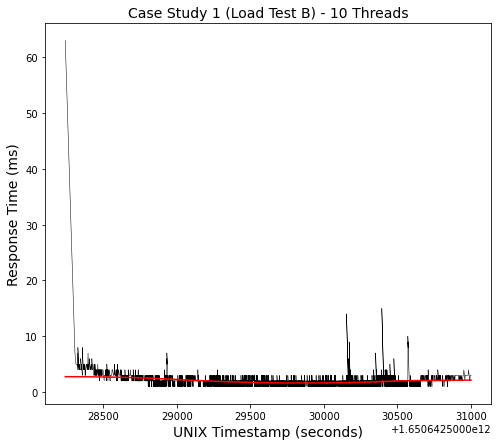

In [14]:
plt.figure(figsize=(8, 7))
t = 10
x = dfb[dfb["Threads"] == t]["timeStamp"]
y = dfb[dfb["Threads"] == t]["elapsed"]
plt.plot(x, y, color="black", lw=0.5)
plt.plot(x, savgol_filter(y, 10000, 2), color="red")
plt.title(f"Case Study 1 (Load Test B) - {t} Threads", fontsize=14)
plt.xlabel("UNIX Timestamp (seconds)", fontsize=14)
plt.ylabel("Response Time (ms)", fontsize=14)
plt.show()

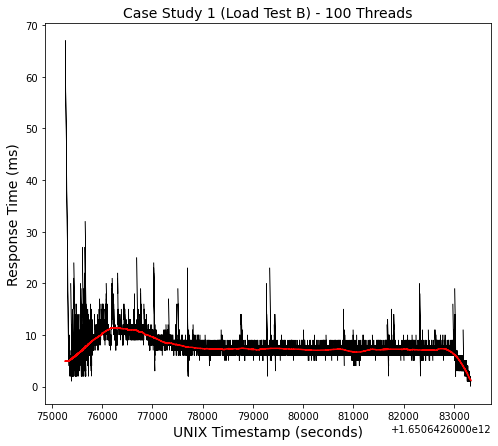

In [15]:
plt.figure(figsize=(8, 7))
t = 100
x = dfb[dfb["Threads"] == t]["timeStamp"]
y = dfb[dfb["Threads"] == t]["elapsed"]
plt.plot(x, y, color="black", lw=0.5)
plt.plot(x, savgol_filter(y, 10000, 2), color="red")
plt.title(f"Case Study 1 (Load Test B) - {t} Threads", fontsize=14)
plt.xlabel("UNIX Timestamp (seconds)", fontsize=14)
plt.ylabel("Response Time (ms)", fontsize=14)
plt.show()

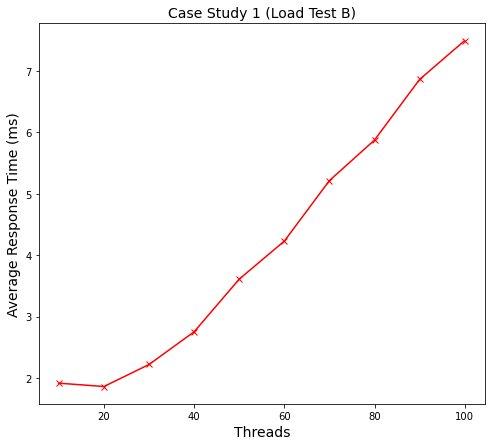

		Pearson correlation = 0.985


In [16]:
plt.figure(figsize=(8, 7))
x = dfb_by_threads.index
y = dfb_by_threads["elapsed"]
plt.plot(x, y, color="red", marker="x")
plt.title("Case Study 1 (Load Test B)", fontsize=14)
plt.xlabel("Threads", fontsize=14)
plt.ylabel("Average Response Time (ms)", fontsize=14)
plt.show()

print(f"\t\tPearson correlation = {round(np.corrcoef(x, y)[0][1], 3)}")